In [30]:
import pandas as pd

#Читаем данные
login_logs = pd.read_csv('login_logs.csv')
sales_orders = pd.read_csv('sales_orders.csv')
sales_orders_items = pd.read_csv('sales_orders_items.csv')

#Преобразуем столбец 'login_time' в формат datetime в DataFrame login_logs
login_logs['login_time'] = pd.to_datetime(login_logs['login_time'])

#Преобразуем столбец 'creation_time' в формат datetime в DataFrame sales_orders
sales_orders['creation_time'] = pd.to_datetime(sales_orders['creation_time'])


#Смотрим первые 5 строк
print(login_logs.head())
print(sales_orders.head())
print(sales_orders_items.head())

   login_log_id  user_id          login_time
0       1385328    99160 2021-07-01 00:00:33
1       1385329    83272 2021-07-01 00:00:38
2       1385330    83272 2021-07-01 00:00:42
3       1385331    96640 2021-07-01 00:02:08
4       1385332    99160 2021-07-01 00:02:38
   order_id  fk_buyer_id  fk_depot_id sales_order_status       creation_time
0    119874        82228            5           Rejected 2021-07-01 00:35:28
1    119877        40476            1           Rejected 2021-07-01 02:02:43
2    119880        41728            8            Shipped 2021-07-01 02:42:12
3    119883        97616            4           Rejected 2021-07-01 02:56:00
4    119886        12440            1           Rejected 2021-07-01 03:11:31
   order_item_id  fk_product_id  fk_order_id  ordered_quantity  \
0          62609           7818       119874                 1   
1          62610           7607       119877                 1   
2          62611           9916       119880                 2   
3   

In [31]:
#Выводим общую информацию о DataFrame login_logs.
print(login_logs.info())

#Выводим общую информацию о DataFrame sales_orders.
print(sales_orders.info())

#Выводим общую информацию о DataFrame sales_orders_items.
print(sales_orders_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666357 entries, 0 to 666356
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   login_log_id  666357 non-null  int64         
 1   user_id       666357 non-null  int64         
 2   login_time    666357 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 15.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            13630 non-null  int64         
 1   fk_buyer_id         13630 non-null  int64         
 2   fk_depot_id         13630 non-null  int64         
 3   sales_order_status  13630 non-null  object        
 4   creation_time       13630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.6+ KB
N

In [32]:
#Подсчитываем количество отсутствующих значений в DataFrame login_logs и выводит их на экран.
print("Login Logs missing values:\n", login_logs.isnull().sum())

#Подсчитываем количество отсутствующих значений в DataFrame sales_orders и выводит их на экран.
print("Sales Orders missing values:\n", sales_orders.isnull().sum())

#Подсчитываем количество отсутствующих значений в DataFrame sales_orders_items и выводит их на экран.
print("Sales Orders Items missing values:\n", sales_orders_items.isnull().sum())

Login Logs missing values:
 login_log_id    0
user_id         0
login_time      0
dtype: int64
Sales Orders missing values:
 order_id              0
fk_buyer_id           0
fk_depot_id           0
sales_order_status    0
creation_time         0
dtype: int64
Sales Orders Items missing values:
 order_item_id              0
fk_product_id              0
fk_order_id                0
ordered_quantity           0
order_quantity_accepted    0
rate                       0
dtype: int64


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


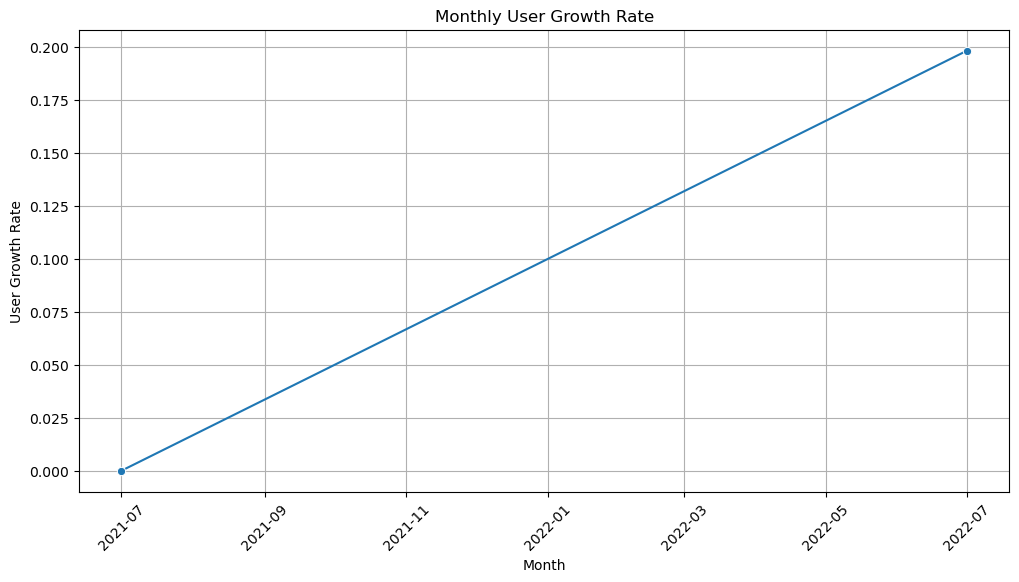

       month  user_id  user_growth_rate
0 2021-07-01    10867          0.000000
1 2022-07-01    13022          0.198307


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


#Преобразуем время входа в месячный период и затем в метку времени
login_logs['month'] = login_logs['login_time'].dt.to_period('M').dt.to_timestamp()

#Группируем данные по месяцам и считаем количество уникальных пользователей для каждого месяца, затем сбрасываем индексы
monthly_user_growth = login_logs.groupby('month')['user_id'].nunique().reset_index()

#Рассчитываем процентное изменение количества пользователей по сравнению с предыдущим месяцем
monthly_user_growth['user_growth_rate'] = monthly_user_growth['user_id'].pct_change()


#Заполняем пропущенные значения в колонке 'user_growth_rate' нулями
monthly_user_growth['user_growth_rate'].fillna(0, inplace=True)

#Строим линейный график для отображения ежемесячного коэффициента роста пользователей
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_user_growth, x='month', y='user_growth_rate', marker='o')

#Оформляем заголовок и подписи осей графика
plt.title('Monthly User Growth Rate')
plt.xlabel('Month')
plt.ylabel('User Growth Rate')

#Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

#Включаем сетки на графике
plt.grid(True)

#Делаем отображение графика
plt.show()

#Выводим первые несколько строк из DataFrame monthly_user_growth
print(monthly_user_growth.head())

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


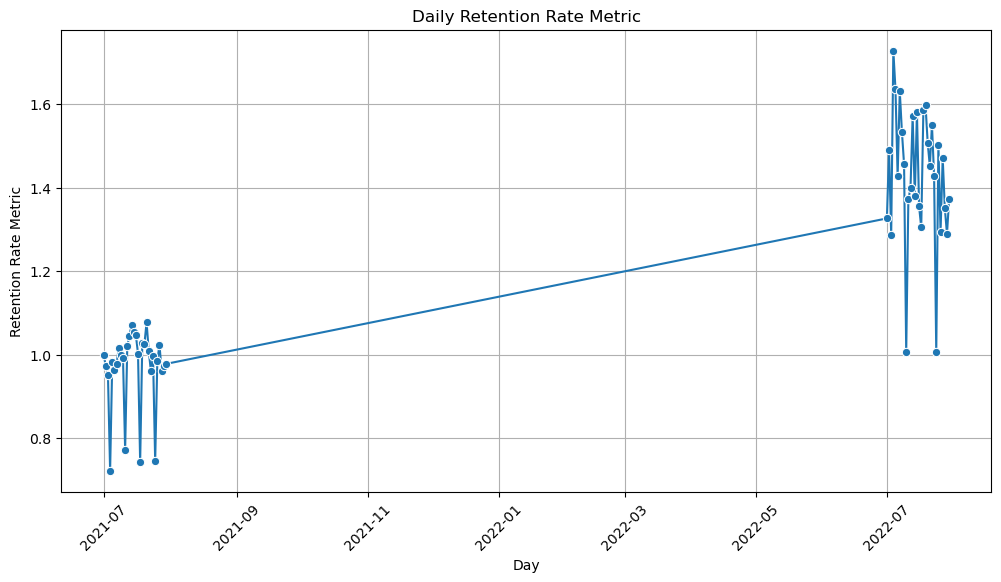

In [38]:
#Конвертируем столбец 'login_time' в формат datetime.
login_logs['login_time'] = pd.to_datetime(login_logs['login_time'])

#Группируем данные в login_logs по дате входа и вычисляем количество уникальных пользователей для каждой даты
daily_active_users = login_logs.groupby(login_logs['login_time'].dt.date)['user_id'].nunique().reset_index()

#Извлекаем начальное количество пользователей
initial_users = daily_active_users.iloc[0]['user_id']

#Вычисляем метрику удержания для каждого дня
daily_active_users['retention_rate'] = daily_active_users['user_id'] / initial_users

#Визуализируем
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_active_users, x='login_time', y='retention_rate', marker='o')
plt.title('Daily Retention Rate Metric')
plt.xlabel('Day')
plt.ylabel('Retention Rate Metric')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


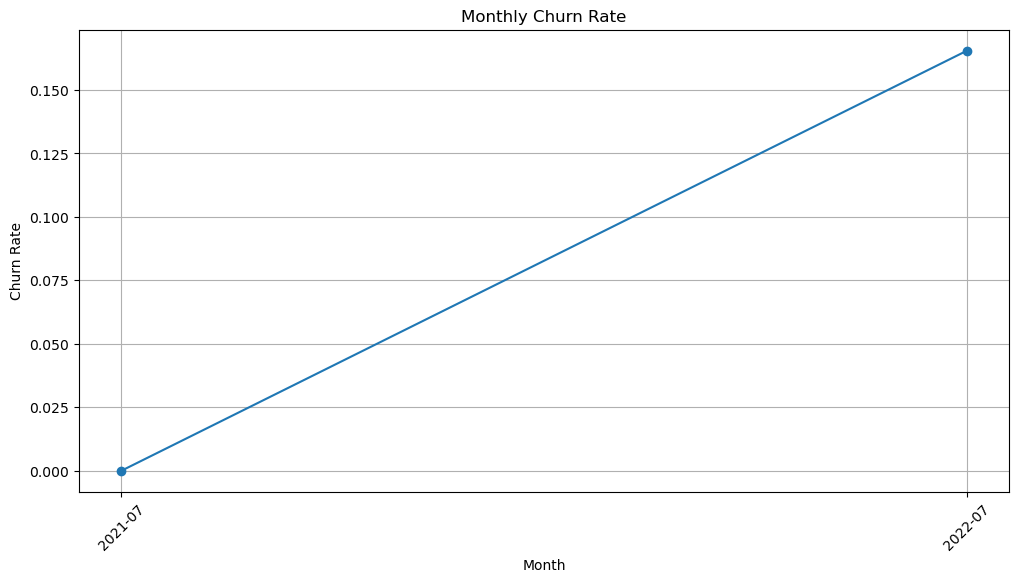

In [27]:
#Рассчитываем отток пользователей
churn_users = login_logs.groupby(login_logs['login_time'].dt.to_period('M'))['user_id'].nunique().diff().fillna(0)

#Рассчитываем общее количество пользователей
total_users = login_logs.groupby(login_logs['login_time'].dt.to_period('M'))['user_id'].nunique()

#Рассчитываем метрику оттока
churn_rate = (churn_users / total_users).fillna(0)

#Преобразуем индексы в строковый тип для построения графика
churn_rate.index = churn_rate.index.astype(str)

#Визуализируем
plt.figure(figsize=(12, 6))
plt.plot(churn_rate.index, churn_rate.values, marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


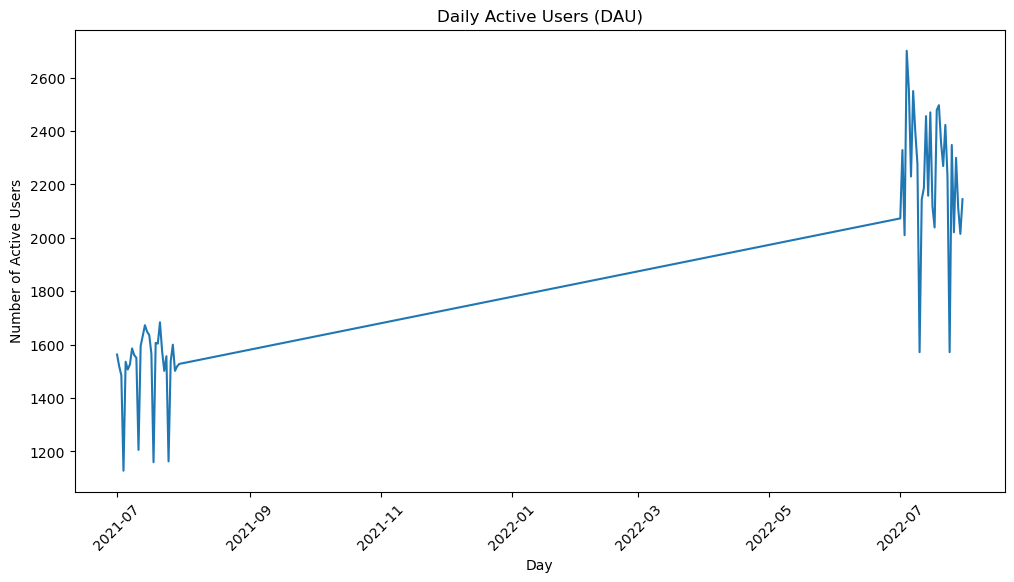

In [16]:
#Добавляем столбец 'day', содержащий дату входа пользователя в формате timestamp, сгруппированную по дням
login_logs['day'] = login_logs['login_time'].dt.to_period('D').dt.to_timestamp()

#Рассчитываем количество уникальных активных пользователей ежедневно
daily_active_users = login_logs.groupby('day')['user_id'].nunique().reset_index()

#Строим линейный график для отображения ежедневного количества активных пользователей
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_active_users, x='day', y='user_id')

#Оформляем заголовок и подписи осей графика
plt.title('Daily Active Users (DAU)')
plt.xlabel('Day')
plt.ylabel('Number of Active Users')

#Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

#Делаем отображение графика
plt.show()


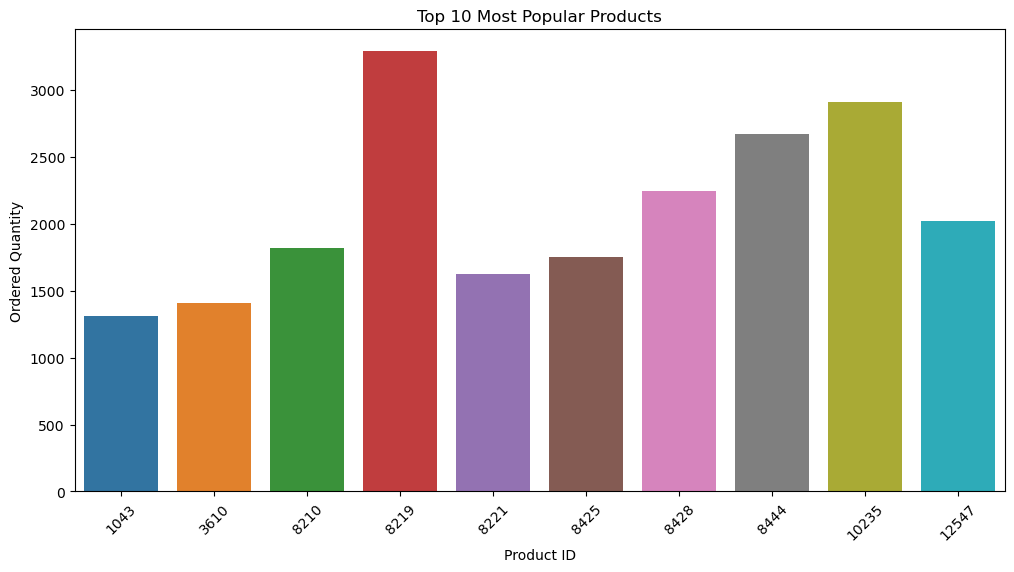

In [10]:
#Группируем данные по артикулу товара и суммируем заказанное количество товара
top_products = sales_orders_items.groupby('fk_product_id')['ordered_quantity'].sum().reset_index()

#Сортируем DataFrame top_products по убыванию заказанного количества товара и выбираем первые 10 записей
top_products = top_products.sort_values(by='ordered_quantity', ascending=False).head(10)

#Строим столбчатую диаграмму для отображения топ-10 продуктов по заказанному количеству
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='fk_product_id', y='ordered_quantity')

#Оформляем заголовок и подписи осей графика
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product ID')
plt.ylabel('Ordered Quantity')

#Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

#Делаем отображение графика
plt.show()

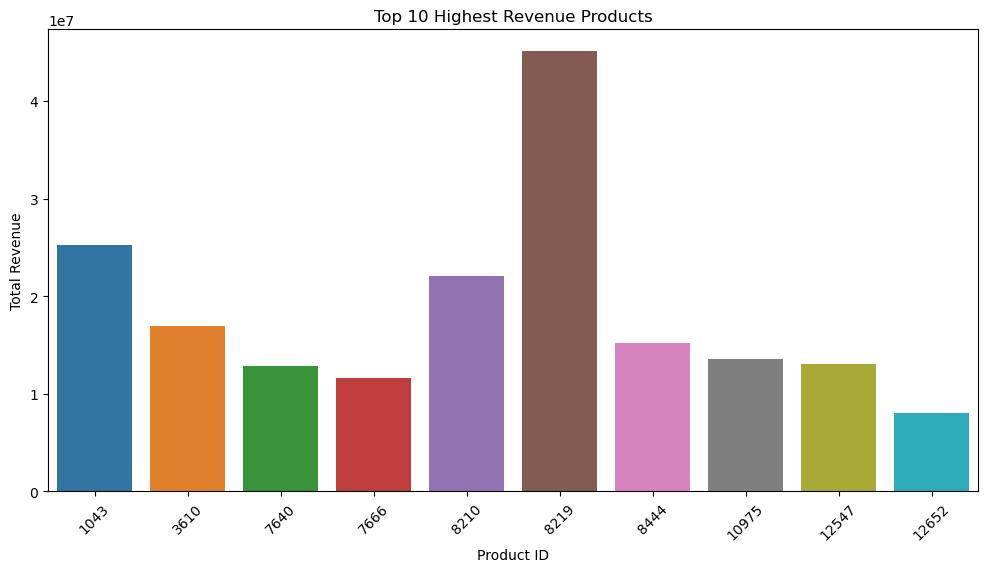

In [11]:
#Вычисляем общий доход для каждой позиции заказа умножив заказанное количество на цену
sales_orders_items['total_revenue'] = sales_orders_items['ordered_quantity'] * sales_orders_items['rate']

#Группируем данные по артикулу товара и вычисляем общий доход для каждого
top_revenue_products = sales_orders_items.groupby('fk_product_id')['total_revenue'].sum().reset_index()

#Сортируем DataFrame top_revenue_products по убыванию общего дохода и выбираем первые 10 записей
top_revenue_products = top_revenue_products.sort_values(by='total_revenue', ascending=False).head(10)

#Строим столбчатую диаграмму для отображения топ-10 продуктов по общему доходу
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_products, x='fk_product_id', y='total_revenue')

#Оформляем заголовок и подписи осей графика
plt.title('Top 10 Highest Revenue Products')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')

#Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

#Делаем отображение графика
plt.show()

In [12]:
#Вычисляем общий доход компании просуммировав все значения столбца total_revenue
total_revenue = sales_orders_items['total_revenue'].sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 401712982.84099996


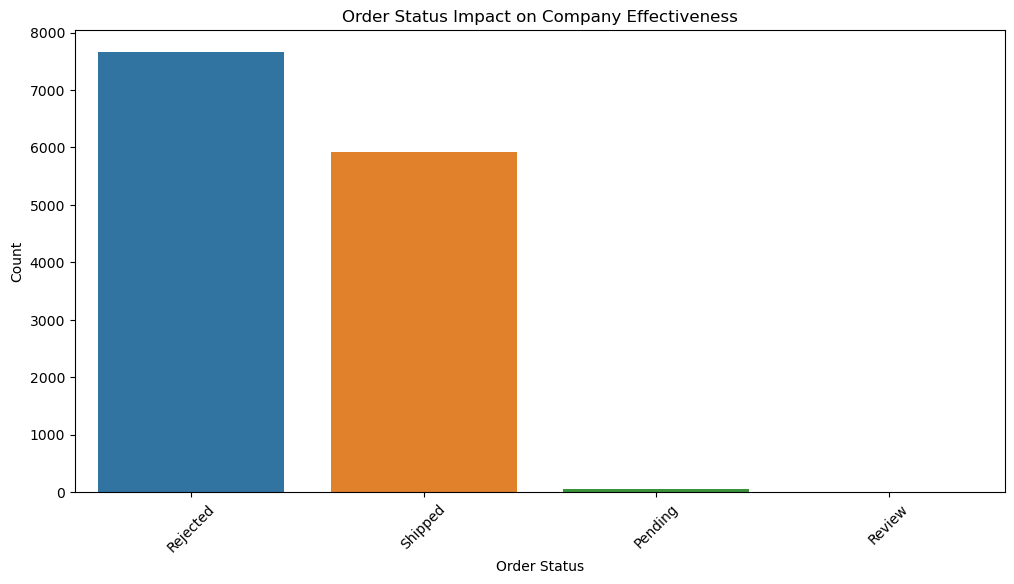

'"Статус заказа действительно может влиять на эффективность компании.Анализ количества заказов по статусам показал, что значительная часть заказов была отклонена ("Rejected"). Это может свидетельствовать о проблемах в процессе обработки заказов, качестве продукции или в самой системе. Высокий процент отклоненных заказов может негативно сказаться на выручке компании и уровне удовлетворенности клиентов.'

In [39]:
#Вычисляем количество заказов для каждого статуса заказа и переименовываем столбцы
order_status_counts = sales_orders['sales_order_status'].value_counts().reset_index()
order_status_counts.columns = ['sales_order_status', 'count']

#Строим столбчатую диаграмму для отображения количества заказов по статусам заказов
plt.figure(figsize=(12, 6))
sns.barplot(data=order_status_counts, x='sales_order_status', y='count')

#Оформляем заголовок и подписи осей графика
plt.title('Order Status Impact on Company Effectiveness')
plt.xlabel('Order Status')
plt.ylabel('Count')

#Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

#Делаем отображение графика
plt.show()

""""Статус заказа действительно может влиять на эффективность компании.Анализ количества заказов по статусам показал, что значительная часть заказов была отклонена ("Rejected"). Это может свидетельствовать о проблемах в процессе обработки заказов, качестве продукции или в самой системе. Высокий процент отклоненных заказов может негативно сказаться на выручке компании и уровне удовлетворенности клиентов."""

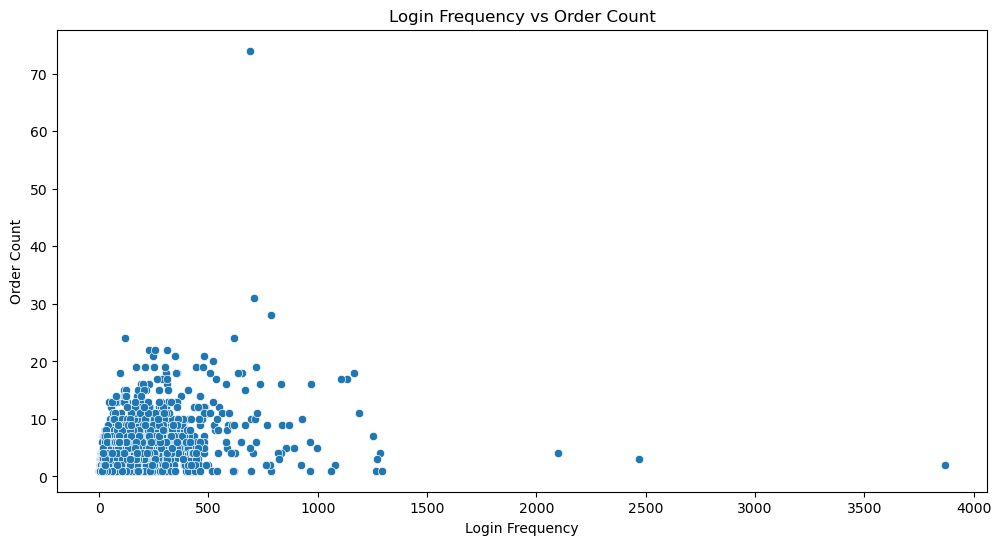

'"Из анализа точечной диаграммы, которая отображает взаимосвязь между частотой входов на сайт и количеством совершаемых заказов, видно, что частота входа значительно влияет на активность покупателей. Наибольшее количество заказов приходится на пользователей с низкой и средней частотой входов, то есть у тех, кто регулярно или интенсивно использует сайт. Однако с увеличением частоты входов (особенно свыше 500) количество совершаемых заказов резко снижается.Это может указывать на то, что пользователи, которые редко заходят на сайт, могут быть более склонны к совершению покупок при посещении сайта, возможно, из-за специфических потребностей или предварительной подготовки к покупке. Пользователи с высокой частотой входов могут быть связаны с исследовательским поведением или общим интересом к бренду, что может не всегда приводить к конкретным покупкам на каждом визите.'

In [41]:
#Группируем данные в login_logs по user_id и вычисляем количество записей (входов) для каждого пользователя
user_login_counts = login_logs.groupby('user_id').size().reset_index(name='login_count')

#Группируем данные в sales_orders по fk_buyer_id и вычисляем количество заказов для каждого покупателя
user_order_counts = sales_orders.groupby('fk_buyer_id').size().reset_index(name='order_count')

#Объединяем данные о количестве входов и количестве заказов для каждого пользователя
#Используем inner join по колонкам 'user_id' и 'fk_buyer_id'
login_order_analysis = pd.merge(user_login_counts, user_order_counts, left_on='user_id', right_on='fk_buyer_id', how='inner')

#Строим точечную диаграмму для визуализации связи между количеством входов и количеством заказов для пользователей
plt.figure(figsize=(12, 6))
sns.scatterplot(data=login_order_analysis, x='login_count', y='order_count')
#Оформляем заголовок и подписи осей графика
plt.title('Login Frequency vs Order Count')
plt.xlabel('Login Frequency')
plt.ylabel('Order Count')
#Отображаем график
plt.show()
""""Из анализа точечной диаграммы, которая отображает взаимосвязь между частотой входов на сайт и количеством совершаемых заказов, видно, что частота входа значительно влияет на активность покупателей. Наибольшее количество заказов приходится на пользователей с низкой и средней частотой входов, то есть у тех, кто регулярно или интенсивно использует сайт. Однако с увеличением частоты входов (особенно свыше 500) количество совершаемых заказов резко снижается.Это может указывать на то, что пользователи, которые редко заходят на сайт, могут быть более склонны к совершению покупок при посещении сайта, возможно, из-за специфических потребностей или предварительной подготовки к покупке. Пользователи с высокой частотой входов могут быть связаны с исследовательским поведением или общим интересом к бренду, что может не всегда приводить к конкретным покупкам на каждом визите."""